In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, Button, ToggleButtons, IntSlider
import pandas as pd

# --- Setup: True CTRs for ads ---
true_ctrs = [0.1, 0.3, 0.2]   # Hidden from bandit (ground truth)
n_ads = len(true_ctrs)

# --- Storage for results ---
ad_counts = np.zeros(n_ads)   # how many times each ad was shown
ad_rewards = np.zeros(n_ads)  # how many clicks each ad got
history = []                  # log of rounds


# --- Simulate showing an ad ---
def show_ad(ad_index):
    reward = np.random.rand() < true_ctrs[ad_index]
    ad_counts[ad_index] += 1
    ad_rewards[ad_index] += reward
    history.append((len(history)+1, ad_index, int(reward)))
    return reward

# --- ε-greedy bandit selection ---
def select_ad_epsilon_greedy(epsilon=0.1):
    if np.random.rand() < epsilon:
        return np.random.randint(0, n_ads)  # explore
    else:
        estimates = ad_rewards / (ad_counts + 1e-6)  # avoid div/0
        return np.argmax(estimates)  # exploit

# --- Plot current estimates ---
def plot_estimates():
    estimates = ad_rewards / (ad_counts + 1e-6)
    plt.figure(figsize=(6,4))
    plt.bar(range(n_ads), estimates, alpha=0.7, label="Estimated CTR")
    plt.bar(range(n_ads), true_ctrs, alpha=0.3, label="True CTR")
    plt.xticks(range(n_ads), [f"Ad {i}" for i in range(n_ads)])
    plt.ylabel("CTR")
    plt.legend()
    plt.show()


# --- Run simulation automatically ---
def run_bandit(rounds=100, epsilon=0.1):
    for _ in range(rounds):
        ad = select_ad_epsilon_greedy(epsilon)
        show_ad(ad)
    plot_estimates()

    # Final recommendation
    best_estimate = np.argmax(ad_rewards / (ad_counts+1e-6))
    print(f"✅ Recommended Ad: Ad {best_estimate} "
          f"(Estimated CTR={ad_rewards[best_estimate]/ad_counts[best_estimate]:.2f})")

    # Show log
    df = pd.DataFrame(history, columns=["Round", "Ad", "Reward"])
    display(df.tail(10))  # last 10 rounds


# --- Interactive mode for manual/auto ---
def interactive_demo(mode="Auto", ad_choice="Ad 0", epsilon=0.1):
    if mode == "Manual":
        ad = int(ad_choice.split()[-1])
    else:
        ad = select_ad_epsilon_greedy(epsilon)

    reward = show_ad(ad)
    print(f"Round {len(history)}: Shown {ad}, Reward={reward}")

    plot_estimates()
    df = pd.DataFrame(history, columns=["Round", "Ad", "Reward"])
    display(df.tail(10))



In [2]:
# --- Widgets for interaction ---
interact(
    interactive_demo,
    mode=ToggleButtons(options=["Auto", "Manual"]),
    ad_choice=Dropdown(options=[f"Ad {i}" for i in range(n_ads)], value="Ad 0"),
    epsilon=IntSlider(min=0, max=100, value=10, description="ε (%)")
);

interactive(children=(ToggleButtons(description='mode', options=('Auto', 'Manual'), value='Auto'), Dropdown(de…

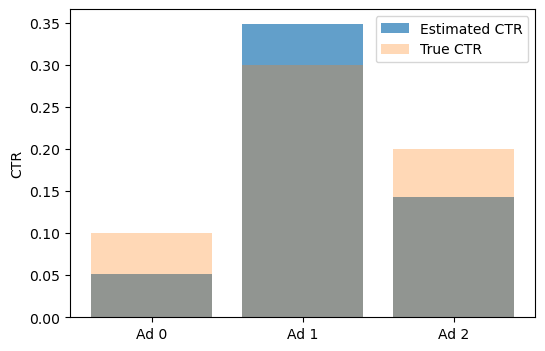

✅ Recommended Ad: Ad 1 (Estimated CTR=0.35)


,Round,Ad,Reward
558,559,1,0
559,560,1,1
560,561,1,0
561,562,1,0
562,563,1,0
563,564,1,1
564,565,1,1
565,566,1,1
566,567,1,0
567,568,1,1


In [5]:
run_bandit(rounds=500, epsilon=0.1)
